# Einlesen der CSV Datei

In [161]:
import pandas as pd

df = pd.read_csv('Data/Moodle.csv',delimiter=";")
df

,ID-Nummer,Abteilung,Klassenarbeit,Kl._anlegen,Obj.erzeugen,Methoden_überl.,Assoziationen,Vererbung,Überschreiben,Interfaces
0,NaN,J,100.00 %,90.00 %,100.00 %,92.86 %,100.00 %,100.00 %,100.00 %,100.00 %
1,NaN,J,80.62 %,70.00 %,100.00 %,64.29 %,72.22 %,77.27 %,83.33 %,93.58 %
2,NaN,J,95.07 %,95.00 %,100.00 %,100.00 %,100.00 %,100.00 %,100.00 %,100.00 %
3,NaN,J,85.80 %,50.00 %,100.00 %,100.00 %,100.00 %,100.00 %,100.00 %,100.00 %
4,NaN,J,94.93 %,90.00 %,100.00 %,100.00 %,88.89 %,95.45 %,100.00 %,91.30 %
...,...,...,...,...,...,...,...,...,...,...
119,NaN,N,89.31 %,75.00 %,100.00 %,100.00 %,94.44 %,100.00 %,100.00 %,100.00 %
120,NaN,N,88.62 %,90.00 %,100.00 %,71.43 %,100.00 %,95.45 %,100.00 %,52.38 %
121,NaN,N,60.33 %,100.00 %,92.86 %,92.86 %,100.00 %,95.45 %,100.00 %,-
122,NaN,N,79.46 %,90.00 %,85.71 %,57.14 %,69.44 %,95.45 %,86.11 %,48.03 %


Die Daten sind noch ungünstig formatiert und müssen gewandelt werden:
- Prozentwerte müssen in Fließkomma Werte umgewandelt werden
- Wenn ein Test nicht geschrieben wurde, so müssen 0.0 eingetragen werden

In [162]:
for column in df.columns[2:]:
    df[column] = df[column].str.replace('%','')
    df[column] = df[column].str.replace('-','0.0')
    df[column] = df[column].astype(float)
    
df

,ID-Nummer,Abteilung,Klassenarbeit,Kl._anlegen,Obj.erzeugen,Methoden_überl.,Assoziationen,Vererbung,Überschreiben,Interfaces
0,NaN,J,100.00,90.0,100.00,92.86,100.00,100.00,100.00,100.00
1,NaN,J,80.62,70.0,100.00,64.29,72.22,77.27,83.33,93.58
2,NaN,J,95.07,95.0,100.00,100.00,100.00,100.00,100.00,100.00
3,NaN,J,85.80,50.0,100.00,100.00,100.00,100.00,100.00,100.00
4,NaN,J,94.93,90.0,100.00,100.00,88.89,95.45,100.00,91.30
...,...,...,...,...,...,...,...,...,...,...
119,NaN,N,89.31,75.0,100.00,100.00,94.44,100.00,100.00,100.00
120,NaN,N,88.62,90.0,100.00,71.43,100.00,95.45,100.00,52.38
121,NaN,N,60.33,100.0,92.86,92.86,100.00,95.45,100.00,0.00
122,NaN,N,79.46,90.0,85.71,57.14,69.44,95.45,86.11,48.03


In [163]:

print (df.dtypes)

ID-Nummer          float64
Abteilung           object
Klassenarbeit      float64
Kl._anlegen        float64
Obj.erzeugen       float64
Methoden_überl.    float64
Assoziationen      float64
Vererbung          float64
Überschreiben      float64
Interfaces         float64
dtype: object


Nun kann man schon mal den Durchschnitt in der Klassenarbeit anzeige

In [164]:
df["Klassenarbeit"].mean()

78.63887096774194

Will man nur eine Klasse haben, so muss ein Teilmenge gebildet werden!

In [165]:
dj=df.loc[df['Abteilung'] == "J"]
dj["Klassenarbeit"].mean()


80.845

Nun kann z.B. die Notenverteilung in der Klasse als Tortendiagramm (Pie Chart) ausgegeben werden!

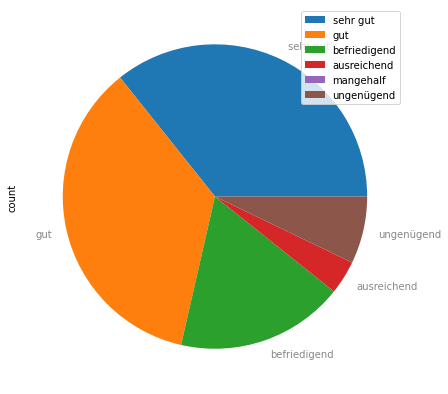

In [191]:
grades = pd.DataFrame({'grade': ['sehr gut', 'gut', 'befriedigend', 'ausreichend','mangehalf','ungenügend'],
                   'count': [0, 0, 0,0,0,0]})
grades.set_index('grade', inplace=True)

for row in dj["Klassenarbeit"]:
    if row>=91:
        grades["count"][0]+=1
    elif row>=82:
        grades["count"][1]+=1
    elif row>=66:
        grades["count"][2]+=1
    elif row>=50:
        grades["count"][3]+=1
    elif row>=30:
        grades["count"][4]+=1
    else:
        grades["count"][5]+=1
 
plot = grades.plot.pie(y='count', figsize=(7, 7), textprops={'color':"#888888"})

